# CRAWLING DATA TWITTER MENGGUNAKAN METODE VECTOR SPACE MODEL

Crawling Data adalah teknik pengumpulan data yang digunakan untuk mengindeks informasi pada halaman menggunakan URL (Uniform Resource Locator) dengan menyertakan API (Application Programming Interface) untuk melakukan penambangan dataset yang lebih besar.

Data yang dapat kamu kumpulkan dapat berupa text, audio, video, dan gambar. Kamu dapat memulai dengan melakukan penambangan data pada API yang bersifat open source seperti yang disediakan oleh Twitter. Untuk melakukan crawling data di Twitter kamu dapat menggunakan library scrapy ataupun twint pada python.

Untuk Tahap-Tahap sebagai berikut:

Lakukan Connect Google colab dengan goole Drive sebagai penyimpanan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pindah Path ke /content/drive/MyDrive/webmining/webmining

In [2]:
%cd /content/drive/MyDrive/webmining/webmining/

/content/drive/MyDrive/webmining/webmining


Clone Twint dari Github Twint Project

In [3]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/drive/MyDrive/webmining/webmining/twint
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/webmining/webmining/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=0e0ea6dad7a188520e0ca6d1006816106fe998e95d9687fb97d35bcc6c1c9374
  Stored in directory: /tmp/pip-ephem-wheel-cache-qup2s21a/wheels/88/61/06/bd5d6a887f43cd7ea07380c2bc1fb104f5cc0d03f92a3c50c4
Successfully built twint
  Attempting unins

## Penjelasan Twint

Twint adalah alat pengikis Twitter canggih yang ditulis dengan Python yang memungkinkan untuk menggores Tweet dari profil Twitter tanpa menggunakan API Twitter.

install Library Twint

In [4]:
!pip install twint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


install aiohttp versi 3.7.0

In [5]:
!pip install aiohttp==3.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


melakukan Import Twint

In [6]:
import twint

Install Nest Asyncio dan lakukan Import

In [7]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply() 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


\configurasi Twint dengan value seperti dibawah

In [72]:
c = twint.Config()
c.Search = 'tragedi kanjuruhan'
c.Pandas = True
c.Limit = 60
c.Store_csv = True
c.Custom["tweet"] = ["tweet"]
c.Output = "dataGanjar.csv"
twint.run.Search(c)

1579987355355607040 2022-10-12 00:08:34 +0000 <KartumerahNews> Mahfud MD Bicara Gas Air Mata Kedaluarsa Tragedi Kanjuruhan, Pengamat Cium Indikasi Korupsi  https://t.co/pelC79zL1a
1579987252834603008 2022-10-12 00:08:10 +0000 <detik_jatim> Kematian Helen yang Menambah Duka Tragedi Kanjuruhan: Korban Jiwa 132 Orang  https://t.co/HMdgdOSS3B
1579987240520151042 2022-10-12 00:08:07 +0000 <BatamPos> Lusa Kirim Laporan Tragedi Kanjuruhan ke Presiden  https://t.co/KIqX0e9gKA
1579987171947479042 2022-10-12 00:07:51 +0000 <NurulIm81316494> Polresta Malang Kota Sambangi Korban Tragedi Kanjuruhan Alami Iritasi Mata  https://t.co/KcpArqn33M  https://t.co/Y9bL6yVFzX
1579986986093645824 2022-10-12 00:07:06 +0000 <tvOneNews> Machfud MD Sebut TGIPF akan Serahkan Hasil Investigasi Tragedi Kanjuruhan Kepada Presiden Jokowi pada Jumat 14/10  https://t.co/AJoW0IYERt
1579986946570715136 2022-10-12 00:06:57 +0000 <boedyirh> @detikcom Di luar tragedi Kanjuruhan, saya rasa kalau klub bisa mengedukasi supporte

## Penjelasan Pandas

**Pandas adalah paket Python open source yang paling sering dipakai untuk menganalisis data serta membangun sebuah machine learning. Pandas dibuat berdasarkan satu package lain bernama Numpy**

melakukan Import Pandas

In [9]:
import pandas as pd

Baca data excel dataGanjar.xlsx yang telah diberi label (Positif,Negatif dan Netral) yang telah simpan di Google Drive

In [10]:
data = pd.read_excel('dataGanjar.xlsx')
data

,tweet,label
0,Ia berharap agar semakin banyak kerja sama yan...,positif
1,Duta Besar Australia untuk Indonesia Penny Wil...,positif
2,"Butuh jalan panjang memang, untuk menâ€™sejati...",netral
3,Kita bisa belajar memandang setiap hubungan pe...,netral
4,Mas Ganjar bantu masyarakat kurang mampu nikma...,positif
...,...,...
68,Mas Ganjar siap menjalankan instruksi Presiden...,positif
69,Jawa Tengah tercatat sebagai provinsi dengan t...,positif
70,Yayasan Dokter Peduli (doctorSHARE) menemui @...,positif
71,Cocok banget deh ah ðŸ‡²ðŸ‡¨ðŸ‘ðŸ‘ #airlan...,netral


## Penjelasan NLTK

**NLTK adalah singkatan dari Natural Language Tool Kit, yaitu sebuah library yang digunakan untuk membantu kita dalam bekerja dengan teks. Library ini memudahkan kita untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning.**

## Penjelasan Sastrawi

**Python Sastrawi adalah pengembangan dari proyek PHP Sastrawi. Python Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. Sastrawi juga dapat diinstal melalui “pip”**

Install Library nltk dan Sastrawi

In [11]:
!pip install nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 2.1 MB/s 


## Penjelasan RE

**Re module Python menyediakan seperangkat fungsi yang memungkinkan kita untuk mencari sebuah string untuk match (match).**

Lakukan Import beberapa Library seperti Pandas,re,nltk,string dan Sastrawi

In [12]:
import pandas as pd
import re
import numpy as np

import nltk
nltk.download('punkt')
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Selanjutnya membuat Function Remove Stopwords yang fungsinya adalah menghapus kata-kata yang tidak diperlukan dalam proses nantinya,sehingga dapat mempercepat proses VSM

In [13]:
def remove_stopwords(text):
    with open('/content/drive/MyDrive/webmining/webmining/contents/stopwords.txt') as f:
        stopwords = f.readlines()
        stopwords = [x.strip() for x in stopwords]
    
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords]
                     
    return text


Steming merupakan proses mengubah kata dalam bahasa Indonesia ke akar katanya misalkan 'Mereka meniru-nirukannya' menjadi 'mereka tiru'

In [14]:
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    result = [stemmer.stem(word) for word in text]
    
    return result

Selanjutnya tahap preprocessing,untuk tahap ini ada beberapa proses seperti:  


> 1.Mengubah Text menjadi huruf kecil

> 2.Menghapus Kata non Ascii

> 4.Menghapus Hastag,Link dan Mention

> 5.Mengubah/menghilangkan tanda (misalkan garis miring menjadi spasi)

> 6.Melakukan tokenization kata dan Penghapusan Kata yang tidak digunakan

> 7.Memfilter kata dari tanda baca

> 8.Mengubah kata dalam bahasa Indonesia ke akar katanya

> 9.Menghapus String kosong















In [15]:
def preprocessing(text):
    #case folding
    text = text.lower()

    #remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")

    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')

    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

    #replace weird characters
    text = text.replace('“', '"')
    text = text.replace('”', '"')
    text = text.replace('-', ' ')

    #tokenization and remove stopwords
    text = remove_stopwords(text)

    #remove punctuation    
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]  

    #stemming
    text = stemming(text)

    #remove empty string
    text = list(filter(None, text))
    return text

Selanjutnya pindah Path ke Folder contents

In [16]:
%cd /content/drive/MyDrive/webmining/webmining/contents

/content/drive/MyDrive/webmining/webmining/contents


Simpan hasil dari preprocessing ke dalam bentuk CSV

In [17]:
#data['tweet'].apply(preprocessing).to_excel('preprocessing.xlsx')


Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
dataTextPre = pd.read_excel('/content/drive/MyDrive/webmining/webmining/contents/preprocessing.xlsx')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])
dataTextPre

,Unnamed: 0,tweet,label
0,0,"['harap', 'kerja', 'jalin', 'jawa', 'australia']",positif
1,1,"['duta', 'australia', 'indonesia', 'penny', 'w...",positif
2,2,"['butuh', 'jalan', 'men', 'sejati', 'teman', '...",netral
3,3,"['ajar', 'pandang', 'hubung', 'teman', 'milik'...",netral
4,4,"['mas', 'ganjar', 'bantu', 'masyarakat', 'nikm...",positif
...,...,...,...
68,68,"['mas', 'ganjar', 'jalan', 'instruksi', 'presi...",positif
69,69,"['jawa', 'catat', 'provinsi', 'tingkat', 'infl...",positif
70,70,"['yayasan', 'dokter', 'peduli', 'doctorshare',...",positif
71,71,"['cocok', 'banget', 'deh', 'ah', 'typa', 'girl']",netral


Melihat Jumlah Baris dan Kata

In [19]:
matrik_vsm=bag.toarray()
matrik_vsm.shape

(73, 398)

In [20]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
a=vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Tampilan data VSM dengan labelnya 

In [22]:
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF


,1000,17,17092022,20,2022,2024,30,acara,ada,agenda,...,warga,wilayah,wiliam,ya,yaqowiyu,yayasan,yeah,yg,yogyakarta,zaman
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




```
# Ini diformat sebagai kode
```

lalu data diatas ditambahkan dengan label (positif,netral dan negatif)

In [23]:
label = pd.read_excel('/content/drive/MyDrive/webmining/webmining/twint/dataGanjar.xlsx')
dj = pd.concat([dataTF.reset_index(), label["label"]], axis=1)
dj

,"(index,)","(1000,)","(17,)","(17092022,)","(20,)","(2022,)","(2024,)","(30,)","(acara,)","(ada,)",...,"(wilayah,)","(wiliam,)","(ya,)","(yaqowiyu,)","(yayasan,)","(yeah,)","(yg,)","(yogyakarta,)","(zaman,)",label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,positif
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
4,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
69,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,positif
70,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,0,0,positif
71,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral


In [24]:
dj['label'].unique()

array(['positif', 'netral', 'negatif'], dtype=object)

## Penjelasan Scikit-learn

Scikit-learn atau sklearn merupakan sebuah module dari bahasa pemrograman Python yang dibangun berdasarkan NumPy, SciPy, dan Matplotlib. Fungsi dari module ini adalah untuk membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine learning atau data science.

install scikit-learn

In [25]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Penjelasan Information Gain

Information Gain merupakan teknik seleksi fitur yang memakai metode scoring untuk nominal
ataupun pembobotan atribut kontinue yang didiskretkan menggunakan maksimal entropy. Suatu entropy
digunakan untuk mendefinisikan nilai Information Gain. Entropy menggambarkan banyaknya informasi
yang dibutuhkan untuk mengkodekan suatu kelas. Information Gain (IG) dari suatu term diukur
dengan menghitung jumlah bit informasi yang diambil dari prediksi kategori dengan ada atau tidaknya
term dalam suatu dokumen.


$$
Entropy \ (S) \equiv \sum ^{c}_{i}P_{i}\log _{2}p_{i}
$$

c : jumlah nilai yang ada pada atribut target (jumlah kelas klasifikasi).

Pi : porsi sampel untuk kelas i.


$$
Gain \ (S,A) \equiv Entropy(S) - \sum _{\nu \varepsilon \ values } \dfrac{\left| S_{i}\right| }{\left| S\right|} Entropy(S_{v})
$$

A : atribut

V : menyatakan suatu nilai yang mungkin untuk atribut A

Values (A) : himpunan nilai-nilai yang mungkin untuk atribut A

|Sv| : jumlah Sampel untuk nilai v

|S| : jumlah seluruh sample data Entropy 

(Sv) : entropy untuk sampel sampel yang memiliki nilai v


In [26]:
from sklearn.model_selection import train_test_split
#membagi kumpulan data menjadi data pelatihan dan data pengujian.
X_train,X_test,y_train,y_test=train_test_split(dj.drop(labels=['label'], axis=1),
    dj['label'],
    test_size=0.3,
    random_state=0)

**Penjelasan mutual_info_classif**
mengukur ketergantungan antara variabel. Itu sama dengan nol jika dan hanya jika dua variabel acak independen, dan nilai yang lebih tinggi berarti ketergantungan yang lebih tinggi.

In [27]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.06930987, 0.04091137, 0.05973178,
       0.        , 0.02823866, 0.03142613, 0.        , 0.        ,
       0.02384986, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07845353, 0.        , 0.        , 0.00238972,
       0.01908711, 0.07458268, 0.0081268 , 0.        , 0.03899338,
       0.        , 0.        , 0.04284777, 0.06373848, 0.02300764,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0158737 , 0.01557037, 0.07146865, 0.01113477, 0.01308537,
       0.        , 0.        , 0.02620034, 0.01819   , 0.0073205 ,
       0.0419287 , 0.        , 0.00658355, 0.        , 0.06900449,
       0.06337515, 0.07348671, 0.00299335, 0.        , 0.        ,
       0.        , 0.        , 0.0264194 , 0.        , 0.00784878,
       0.        , 0.16112552, 0.01955857, 0.        , 0.        ,
       0.01112239, 0.        , 0.01172032, 0.07635348, 0.        ,
       0.04399298, 0.        , 0.        , 0.11985622, 0.     

merangking fitur(Kata) sesuai dengan fitur(Kata) yang paling banyak keluar

In [28]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

(ganjar,)      0.358566
(elu,)         0.228352
(sulawesi,)    0.173336
(sahabat,)     0.167993
(buka,)        0.161126
                 ...   
(pangan,)      0.000000
(give,)        0.000000
(girl,)        0.000000
(gelas,)       0.000000
(index,)       0.000000
Length: 399, dtype: float64

menvisualkan data dengan grafik bar dengan urutan paling besar ke rendah

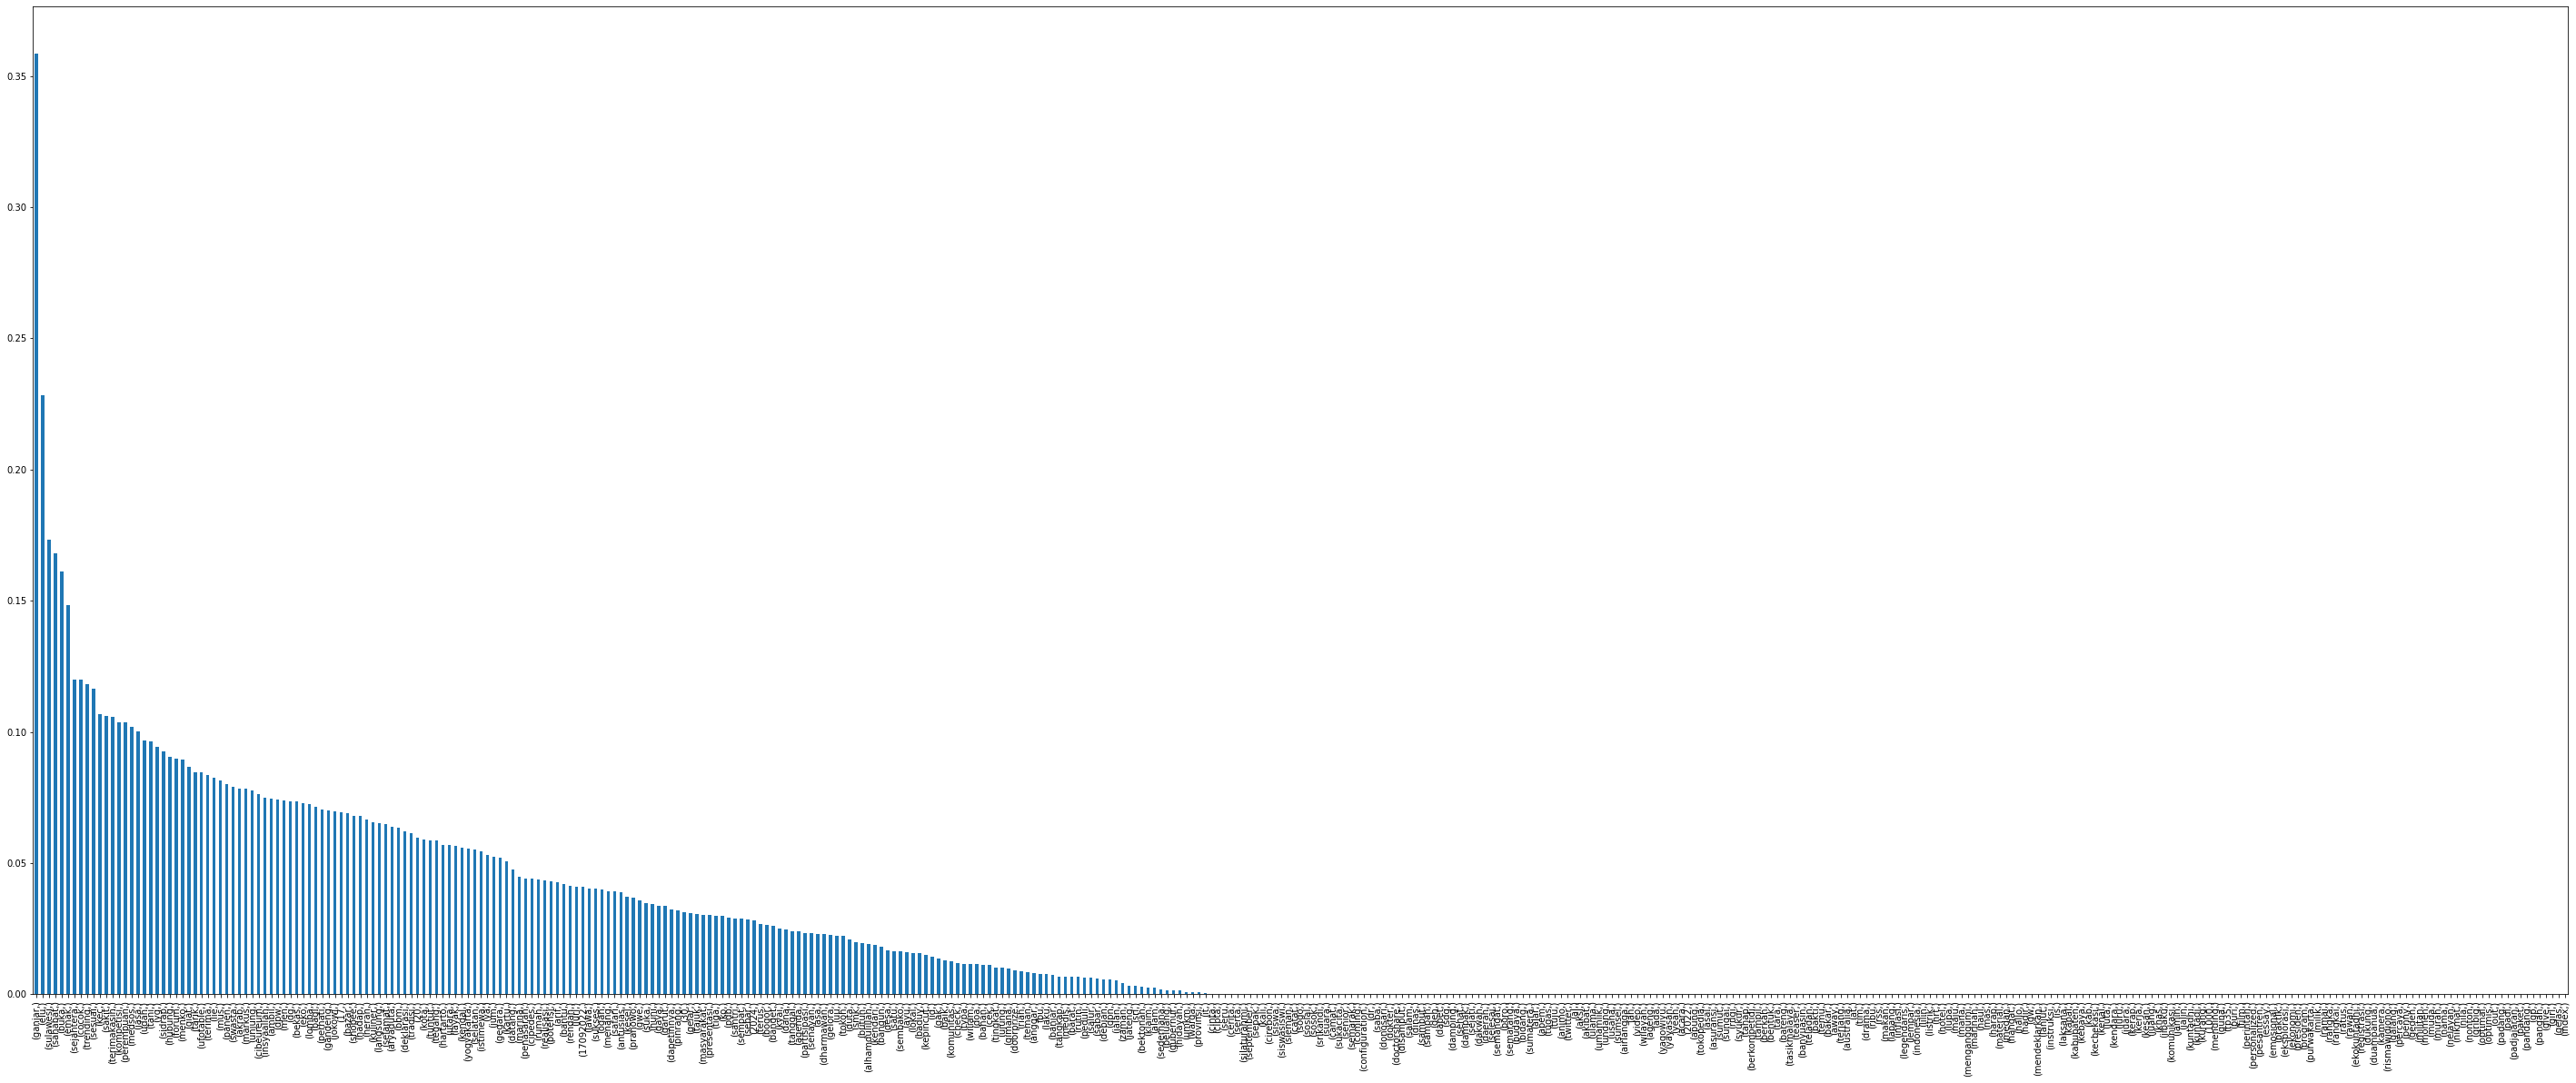

In [29]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(50, 20))


Import SelectKBest

In [30]:
from sklearn.feature_selection import SelectKBest


Pilih fitur menurut k skor tertinggi.

In [31]:
sel_five_cols = SelectKBest(mutual_info_classif, k=100)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Index([           ('20',),           ('ada',),        ('agenda',),
               ('ageng',),        ('akibat',), ('alhamdulillah',),
               ('ambil',),        ('anggar',),      ('antusias',),
                 ('asa',),          ('bagi',),         ('bakar',),
               ('bantu',),         ('barat',),           ('bbm',),
            ('bektonah',),        ('bidang',),          ('buka',),
               ('camat',),           ('cek',),        ('cerita',),
               ('check',),       ('cipedes',),       ('damping',),
                 ('deh',),           ('dpw',),        ('dukung',),
                ('emak',),        ('ganjar',),        ('gelora',),
              ('gimana',),      ('gubernur',),         ('hallo',),
              ('hangat',),         ('hotel',),           ('hrt',),
                ('huni',),            ('id',),       ('inflasi',),
               ('jalan',),        ('kebaya',),           ('kec',),
           ('kecbekasi',),       ('kendara',),       ('kendari

In [32]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

## Penjelasan Naive Bayes

Naive Bayes adalah algoritma machine learning yang digunakan untuk keperluan klasifikasi atau pengelompokan suatu data. Algoritma ini didasarkan pada teorema probabilitas yang dikenalkan oleh ilmuwan Inggris Thomas Bayes. Naive Bayes berfungsi memprediksi probabilitas di masa depan berdasarkan pengalaman sebelumnya, sehingga dapat digunakan untuk pengambilan keputusan.

In [33]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB()

Menampilkan accuracy dari nilai test dengan method Gaussion Naive Bayes

In [34]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
testing = gauss.predict(X_test) 
accuracy_gauss=round(accuracy_score(y_test,testing)* 100, 2)
accuracy_gauss

72.73

## Penjelasan Matplotib

Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib pertama kali diciptakan oleh John D. Hunter dan sekarang telah dikelola oleh tim developer yang besar. Awalnya matplotlib dirancang untuk menghasilkan plot grafik yang sesuai pada publikasi jurnal atau artikel ilmiah. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

In [35]:
#import plt
import matplotlib.pyplot as plt
#import metrics
from sklearn import metrics

## Penjelasan Confusion Matrix

Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.

membuat Confusion Matrix dengan column vertical (negatif,netral dan positif) dan column horizontal (negatif,netral dan positif)

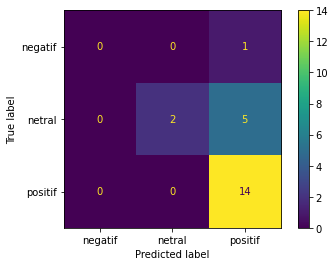

In [36]:
conf_matrix =metrics.confusion_matrix(y_true=y_test, y_pred=testing)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['negatif', 'netral','positif'])
cm_display.plot()
plt.show()

## Penjelasan K-Means

K-Means Clustering merupakan algoritma yang efektif untuk menentukan cluster dalam sekumpulan data, di mana pada algortima tersebut dilakukan analisis kelompok yang mengacu pada pemartisian N objek ke dalam K kelompok (Cluster) berdasarkan nilai rata-rata (means) terdekat. Adapun persamaan yang sering digunakan dalam pemecahan masalah dalam menentukan jarak terdekat adalah persamaan Euclidean berikut :


$$
d(p,q) = \sqrt{(p_{1}-q_{1})^2+(p_{2}-q_{2})^2+(p_{3}-q_{3})^2}
$$


d = jarak obyek

p = data 

q = centroid

TruncatedSVD adalah Teknik pengurangan dimensi menggunakan SVD terpotong

In [37]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD


[[ 0.82414645  0.32505654]
 [ 2.93247414 -0.25518105]
 [ 4.43672804 -1.57717881]]


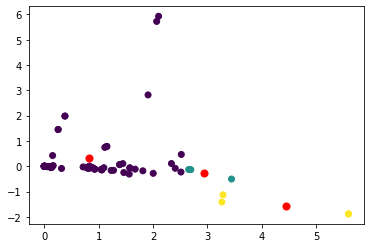

In [38]:
# Latih Kmeans dengan n cluster terbaik
modelKm = KMeans(n_clusters=3, random_state=12)
modelKm.fit(dataTF.values)
prediksi = modelKm.predict(dataTF.values)

# Pengurangan dimensi digunakan untuk memplot dalam representasi 2d
pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(dataTF.values)
centroids=pc.transform(modelKm.cluster_centers_)
print(centroids)
plt.scatter(X_new[:,0],X_new[:,1],c=prediksi, cmap='viridis')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'red')

## Perangkingan Kalimat Berita dengan Method Page Rank

## Penjelasan Scrapy

Scrapy adalah web crawling dan web scraping framework tingkat tinggi yang cepat, digunakan untuk merayapi situs web dan mengekstrak data terstruktur dari halaman mereka. Ini dapat digunakan untuk berbagai tujuan, mulai dari penambangan data hingga pemantauan dan pengujian otomatis.

In [39]:
!pip install scrapy
!pip install crochet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 264 kB 2.1 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 3.1 MB 46.7 MB/s 
     |████████████████████████████████| 93 kB 2.7 MB/s 
     |████████████████████████████████| 254 kB 58.6 MB/s 
     |████████████████████████████████| 4.1 MB 44.9 MB/s 
     |████████████████████████████████| 74 kB 1.7 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=1e5f7489b0558d31eabccf6ed9fe808c789ca623795f7e3f50dafeb4b8a26be0
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import scrapy

In [41]:
import scrapy
from scrapy.crawler import CrawlerRunner
import re
from crochet import setup, wait_for
setup()

class QuotesToCsv(scrapy.Spider):
    name = "MJKQuotesToCsv"
    start_urls = [
        'https://nasional.tempo.co/read/1642981/usai-tragedi-kanjuruhan-jokowi-klaim-indonesia-tak-dikenai-sanksi-dari-fifa',
    ]
    custom_settings = {
        'ITEM_PIPELINES': {
            '__main__.ExtractFirstLine': 1
        },
        'FEEDS': {
            'news.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }
    }

    def parse(self, response):
        """parse data from urls"""
        for quote in response.css('#isi > p'):
            yield {'news': quote.extract()}


class ExtractFirstLine(object):
    def process_item(self, item, spider):
        """text processing"""
        lines = dict(item)["news"].splitlines()
        first_line = self.__remove_html_tags__(lines[0])

        return {'news': first_line}

    def __remove_html_tags__(self, text):
        """remove html tags from string"""
        html_tags = re.compile('<.*?>')
        return re.sub(html_tags, '', text)

@wait_for(10)
def run_spider():
    """run spider with MJKQuotesToCsv"""
    crawler = CrawlerRunner()
    d = crawler.crawl(QuotesToCsv)
    return d

In [42]:
# run_spider()

Mengambil dan Membaca data CSV yang bernama news.csv

In [43]:
dataNews = pd.read_csv('news.csv')
dataNews

,news
0,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ..."
1,"""Alhamdulillah sepak bola Indonesia tidak dike..."
2,"Jokowi menjelaskan selain FIFA, Asian Football..."
3,"""Kita juga akan bersama-sama melakukan sosiali..."
4,FIFA dan AFC bakal membantu
5,"Selain itu, FIFA dan AFC bakal membantu membua..."
6,"Sebelumnya, Menteri BUMN Erick Thohir membeber..."
7,"""Selain menyampaikan belasungkawa atas kejadia..."
8,"Di dalam pertemuan itu, menurut Erick, FIFA me..."
9,"Dukungan itu diberikan FIFA, kata Erick, agar ..."


PyPDF2 adalah pustaka PDF python murni gratis dan open-source yang mampu memisahkan, menggabungkan , memotong, dan mengubah halaman file PDF.

Install PyPDF2

In [44]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 2.2 MB/s 


import PyPDF2

In [45]:
import PyPDF2

Membaca Pdf dari file lalu dibuat menjadi bentuk document Text

In [46]:
pdfReader = PyPDF2.PdfFileReader('/content/drive/MyDrive/webmining/webmining/contents/news.pdf')
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()
document

'TEMPO.CO, Jakarta - Presiden Joko Widodo atau Jokowi mengklaim Indonesia tidak dikenai sanksi \noleh Federasi Sepak Bola Internasional (FIFA) usai Tragedi Kanjuruhan di Malang, Jawa Timur yang \nmenelan korban jiwa hingga 131 orang. Sebelumnya, Jokowi khawatir Indonesia dikenai sanksi \nhingga menelepon dan mengutus Menteri BUMN Erick Thohir untuk bertemu Presiden FIFA Gianni \nInvantino.  \n"Alhamdulillah sepak bola Indonesia tidak dikenakan sanksi oleh FIFA dan FIFA bersama -sama \ndengan pemerintah akan membentuk tim transformasi sepak bola Indonesia dan FIFA akan \nberkantor di Indonesia selama proses -proses tersebut," ujar Jokowi dalam keterangan nya, Sabtu, \n8 Oktober 2022.   \nJokowi menjelaskan selain FIFA, Asian Football Confederation atau AFC juga akan membantu \npemerintah Indonesia membangun stadion dengan standar keamanan tinggi. Selain itu, kedua \norganisasi sepak bola itu bakal membantu Indonesia memformulasikan standar protokol dan \nprosedur pengamanan yang dilakuk

PunktSentenceTokenizer adalah Sebuah tokenizer kalimat yang menggunakan algoritma tanpa pengawasan untuk membangun model untuk kata-kata singkatan, kolokasi, dan kata-kata yang memulai kalimat dan kemudian menggunakan model itu untuk menemukan batas kalimat.

In [47]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [48]:
def tokenize(document):
    # Kita memecahnya menggunakan  PunktSentenceTokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    # sentences_list adalah daftar masing masing kalimat dari dokumen yang ada.
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [49]:
sentences_list = tokenize(document)
sentences_list

['TEMPO.CO, Jakarta - Presiden Joko Widodo atau Jokowi mengklaim Indonesia tidak dikenai sanksi \noleh Federasi Sepak Bola Internasional (FIFA) usai Tragedi Kanjuruhan di Malang, Jawa Timur yang \nmenelan korban jiwa hingga 131 orang.',
 'Sebelumnya, Jokowi khawatir Indonesia dikenai sanksi \nhingga menelepon dan mengutus Menteri BUMN Erick Thohir untuk bertemu Presiden FIFA Gianni \nInvantino.',
 '"Alhamdulillah sepak bola Indonesia tidak dikenakan sanksi oleh FIFA dan FIFA bersama -sama \ndengan pemerintah akan membentuk tim transformasi sepak bola Indonesia dan FIFA akan \nberkantor di Indonesia selama proses -proses tersebut," ujar Jokowi dalam keterangan nya, Sabtu, \n8 Oktober 2022.',
 'Jokowi menjelaskan selain FIFA, Asian Football Confederation atau AFC juga akan membantu \npemerintah Indonesia membangun stadion dengan standar keamanan tinggi.',
 'Selain itu, kedua \norganisasi sepak bola itu bakal membantu Indonesia memformulasikan standar protokol dan \nprosedur pengamanan ya

Merapikan data di atas sehingga lebih enak dibaca

In [50]:
kal=1
for i in sentences_list:
    print('\nKalimat {}'.format(kal))
    kal+=1
    print(i)


Kalimat 1
TEMPO.CO, Jakarta - Presiden Joko Widodo atau Jokowi mengklaim Indonesia tidak dikenai sanksi 
oleh Federasi Sepak Bola Internasional (FIFA) usai Tragedi Kanjuruhan di Malang, Jawa Timur yang 
menelan korban jiwa hingga 131 orang.

Kalimat 2
Sebelumnya, Jokowi khawatir Indonesia dikenai sanksi 
hingga menelepon dan mengutus Menteri BUMN Erick Thohir untuk bertemu Presiden FIFA Gianni 
Invantino.

Kalimat 3
"Alhamdulillah sepak bola Indonesia tidak dikenakan sanksi oleh FIFA dan FIFA bersama -sama 
dengan pemerintah akan membentuk tim transformasi sepak bola Indonesia dan FIFA akan 
berkantor di Indonesia selama proses -proses tersebut," ujar Jokowi dalam keterangan nya, Sabtu, 
8 Oktober 2022.

Kalimat 4
Jokowi menjelaskan selain FIFA, Asian Football Confederation atau AFC juga akan membantu 
pemerintah Indonesia membangun stadion dengan standar keamanan tinggi.

Kalimat 5
Selain itu, kedua 
organisasi sepak bola itu bakal membantu Indonesia memformulasikan standar protokol 

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
vectorizer = CountVectorizer()
cv_matrix=vectorizer.fit_transform(sentences_list)

Menampilkan jumlah Kosa Kata dari Data

In [52]:
print ("Banyaknya kosa kata = ", len((vectorizer.get_feature_names_out())))

Banyaknya kosa kata =  202


Menampilkan jumlah Kalimat dari Data

In [53]:
print ("Banyaknya kalimat = ", (len(sentences_list)))

Banyaknya kalimat =  17


Menampilkan Kosa Kata dari Data

In [54]:
print ("kosa kata = ", (vectorizer.get_feature_names_out()))

kosa kata =  ['131' '2022' 'adanya' 'adapun' 'afc' 'agar' 'agenda' 'akan'
 'alhamdulillah' 'asian' 'atas' 'atau' 'baca' 'bagi' 'bakal' 'bangsa'
 'banyak' 'belasungkawa' 'berdasarkan' 'berdiskusi' 'berkantor'
 'berkontribusi' 'bersama' 'bertemu' 'besar' 'bola' 'bumn' 'co'
 'confederation' 'dalam' 'dan' 'dapat' 'dari' 'datang' 'dengan' 'depan'
 'di' 'diberikan' 'dicintai' 'dikaitkan' 'dikenai' 'dikenakan' 'dilakukan'
 'dipaparkan' 'diskusi' 'dukungan' 'ekonomi' 'emuan' 'erick' 'federasi'
 'fif' 'fifa' 'firmansyah' 'football' 'gianni' 'giovanni' 'hal' 'hingga'
 'indonesia' 'infantino' 'ini' 'internasional' 'invantino' 'itu' 'jadwal'
 'jakarta' 'jawa' 'jiwa' 'joko' 'jokowi' 'juga' 'julnis' 'kabupaten'
 'kami' 'kanjuruhan' 'kapolri' 'kata' 'ke' 'keamanan' 'kebanggaan' 'kedua'
 'kejadian' 'kemajuan' 'kepada' 'kepolisian' 'kesempatan' 'keterangan'
 'khawatir' 'khusus' 'khususnya' 'kita' 'klub' 'komitmen' 'kondisi'
 'konstan' 'korban' 'kronologi' 'maksimal' 'malang' 'masa' 'masukan'
 'melakuka

In [55]:
# mengubah kumpulan dokumen mentah menjadi matriks fitur TF-IDF
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.20893039 0.         0.         ... 0.         0.18243429 0.11833962]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15486352 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.2133249  0.        ]
 [0.         0.         0.         ... 0.23587291 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.20185071]]


Menampilkan Jumlah Kalimat dan Kosa Kata

In [56]:
normal_matrix.shape

(17, 202)

NetworkX adalah paket Python untuk pembuatan, manipulasi, dan studi tentang struktur, dinamika, dan fungsi jaringan yang kompleks. Ini menyediakan:

In [57]:
import networkx as nx

Graph adalah kumpulan dati titik (node) dan garis dimana pasangan – pasangan titik (node) tersebut dihubungkan oleh segmen garis. Node ini biasa disebut simpul (vertex) dan segmen garis disebut ruas (edge)

In [58]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 8)	0.016922784978310058
  (0, 5)	0.044476229416547094
  (0, 3)	0.07470507531673126
  (0, 7)	0.09585456914285453
  (0, 1)	0.1942213246421451
  (0, 10)	0.10165371278754455
  (0, 2)	0.18353774740874507
  (0, 15)	0.28051691717998695
  (0, 9)	0.13660061427043854
  (0, 14)	0.1316822405035506
  (0, 16)	0.13953329173052492
  (0, 13)	0.0762655091348627
  (0, 12)	0.05545907185229088
  (0, 11)	0.10540780689091514
  (0, 6)	0.02361139650449116
  (0, 4)	0.08774693053033637
  (0, 0)	1.0000000000000004
  (1, 12)	0.02679277158898258
  (1, 6)	0.03923635955100562
  (1, 13)	0.06726236381671076
  (1, 11)	0.07768078633033922
  (1, 9)	0.045941343628468176
  (1, 4)	0.027163452336286264
  (1, 3)	0.054329672164743555
  (1, 2)	0.12728192723024565
  :	:
  (15, 14)	0.14579337689260602
  (15, 8)	0.1026815863923701
  (15, 13)	0.04694037434692812
  (15, 11)	0.08492566544152216
  (15, 4)	0.028949538948435584
  (15, 2)	0.09350206458577603
  (15, 3)	0.08151611797404915
  (15, 16)	0.16677525808873744
  (15, 9)	0.23

In [59]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)


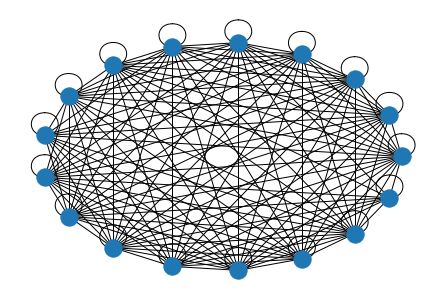

In [60]:
nx.draw_circular(nx_graph)

Jumlah Banyak Sisi 

In [61]:
print('Banyaknya sisi {}'.format(nx_graph.number_of_edges()))

Banyaknya sisi 142


Menkalikan data dengan data Transpose

In [62]:
res_graph = normal_matrix * normal_matrix.T

PageRank menghitung peringkat node dalam grafik G berdasarkan struktur tautan masuk. Awalnya dirancang sebagai algoritma untuk menentukan peringkat halaman web.

In [63]:
ranks=nx.pagerank(nx_graph,)


memasukkan data ke array

In [64]:
arrRank=[]
for i in ranks:
    arrRank.append(ranks[i])

menjadikan data kedalam bentuk tabel lalu digabungkan 

In [65]:
dfRanks = pd.DataFrame(arrRank,columns=['PageRank'])
dfSentence = pd.DataFrame(sentences_list,columns=['News'])
dfJoin = pd.concat([dfSentence,dfRanks], axis=1)
dfJoin

,News,PageRank
0,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",0.065057
1,"Sebelumnya, Jokowi khawatir Indonesia dikenai ...",0.062935
2,"""Alhamdulillah sepak bola Indonesia tidak dike...",0.068197
3,"Jokowi menjelaskan selain FIFA, Asian Football...",0.057320
4,"Selain itu, kedua \norganisasi sepak bola itu ...",0.057742
5,"""Kita juga akan bersama -sama melakukan sosial...",0.055186
6,"FIFA dan AFC bakal membantu \nSelain itu,...",0.054671
7,Jokowi menyebut Presiden FIFA akan datang ke \...,0.055650
8,"Sebelumnya, Menteri BUMN Erick Thohir membeber...",0.053352
9,Pertemuan itu membahas soal tragedi Kanjuruhan...,0.063451


Mengurutkan data berdasarkan hasil tertinggi

In [66]:
sortSentence=dfJoin.sort_values(by=['PageRank'],ascending=False)
sortSentence

,News,PageRank
2,"""Alhamdulillah sepak bola Indonesia tidak dike...",0.068197
15,Adapun Presiden Jokowi sebelumnya telah menele...,0.068102
11,"Di dalam pert emuan itu, menurut Erick, FIFA m...",0.065238
0,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",0.065057
10,"""Selain menyampaikan belasungkawa atas kejadia...",0.063975
9,Pertemuan itu membahas soal tragedi Kanjuruhan...,0.063451
1,"Sebelumnya, Jokowi khawatir Indonesia dikenai ...",0.062935
13,"Dukungan itu diberikan FIFA, kata Erick, agar ...",0.058770
4,"Selain itu, kedua \norganisasi sepak bola itu ...",0.057742
3,"Jokowi menjelaskan selain FIFA, Asian Football...",0.057320


Menampilkan data dari 5 ke atas

In [67]:
sortSentence.head(5)

,News,PageRank
2,"""Alhamdulillah sepak bola Indonesia tidak dike...",0.068197
15,Adapun Presiden Jokowi sebelumnya telah menele...,0.068102
11,"Di dalam pert emuan itu, menurut Erick, FIFA m...",0.065238
0,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",0.065057
10,"""Selain menyampaikan belasungkawa atas kejadia...",0.063975
